In [1]:
from sklearn.svm import SVR
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# load the csv data file
# df = pd.read_csv("./selected_features/rfe_svm_out_50.csv")
# df = pd.read_csv("./selected_features/rfe_svm_mic_out_50.csv")
# df = pd.read_csv("./selected_features/rfe_svm_mic_out_50_with_50percent.csv")
df = pd.read_csv("./selected_features/rfe_sklean_ridge_50.csv")
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [32]:
def split_and_estimator(X, cv, percent):
    clf = SVR()
    clf.set_params(kernel='linear')
    rmse = []
    r_sqrt = []
    for train_idx, test_idx in ShuffleSplit(len(X), cv, percent):
        X_train = X.iloc[train_idx,:]
        X_test = X.iloc[test_idx,:]
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r_sqrt.append(r2_score(y_test, y_pred))
    return np.mean(rmse), np.mean(r_sqrt)

In [18]:
def diff_cv(X, cv, percent):
    rmse_list = []
    r_sqrt_list = []
    for i in cv:
        rmse, r_sqrt = split_and_estimator(X, i, percent)
        rmse_list.append(rmse)
        r_sqrt_list.append(r_sqrt)
    return rmse_list, r_sqrt_list

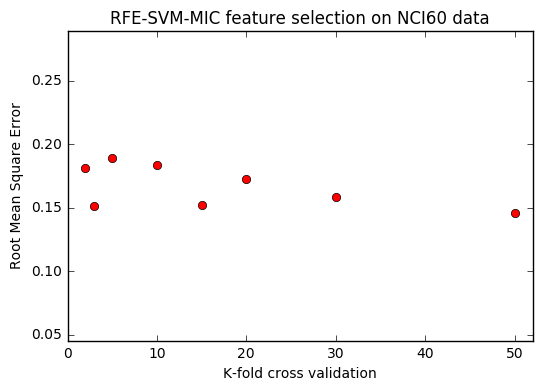

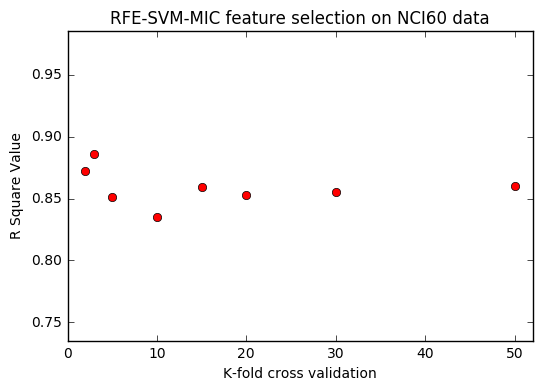

mean rmse: 0.166808412684
 mean R square: 0.85907522636


In [33]:
cv = [2, 3, 5, 10, 15, 20, 30, 50]
rmse_list, r_sqrt_list = diff_cv(X, cv, 0.2)
f1 = plt.figure()

sub1 = f1.add_subplot(111)
sub1.set_title('RFE-SVM-MIC feature selection on NCI60 data') 
sub1.plot(cv, rmse_list, 'ro')
sub1.axis([0, 52, min(rmse_list)-0.1, max(rmse_list)+0.1])
sub1.set_ylabel('Root Mean Square Error')
sub1.set_xlabel("K-fold cross validation")

f2 = plt.figure()

sub2 = f2.add_subplot(111)
sub2.plot(cv, r_sqrt_list, 'ro')
sub2.axis([0, 52, min(r_sqrt_list)-0.1, max(r_sqrt_list)+0.1])
sub2.set_ylabel('R Square Value')
sub2.set_xlabel("K-fold cross validation")
sub2.set_title('RFE-SVM-MIC feature selection on NCI60 data')
plt.show()
plt.gcf().clear()

print("mean rmse:", np.mean(rmse_list))
print(" mean R square:", np.mean(r_sqrt_list))